# Data Science in Practice 2020

## Problem Set 1

### Descriptive report

Authors :
- Rayan Chaouche
- Christopher Padovani
- Jules Triomphe

### 1. Initialization

#### 1.1 Primary analysis

Loading modules :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the customer file :

In [2]:
clients_df = pd.read_csv('customers.csv')
print('There are %s clients.' %(len(clients_df)))

There are 7043 clients.


Checking out the provided information for each customer :

In [3]:
clients_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<!---
**Texte à supprimer**

Sert à vérifier le type de données : objet, int64, int32, etc.
<br>[Documentation *dtypes*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
--->

<!---
# a = clients_df.dtypes
# clients_df.dtypes['customerID']
--->

Extracting the characteristics of all float type customer information categories, we notice that there are no empty cells for each of them and that the longest tenure is 72 years.

We also see that there is a problem with the **TotalCharges** category as it does not appear in this list.

In [4]:
clients_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Using the *.isnull()* method, we count the number of missing values for each information category of the dataset. This does not count empty strings however.

We notice that there are no missing values in the dataset.

In [12]:
clients_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### 1.2 File cleanup

We clean out all lines where the **TotalCharges** category is empty :

In [6]:
clients_df = pd.read_csv('customers.csv')
clients_df = clients_df[clients_df['TotalCharges'] != ' ']
clients_df.TotalCharges = clients_df.TotalCharges.astype('float')

#### 1.3 Identifying values of interest

We extract the list of loyal clients :

In [7]:
clients_df_loyal = clients_df[clients_df['Churn'] != 'Yes']

### 2. Data analysis

#### 2.1 Frequency analysis

We extract the characteristics of all object type customer information categories.

There are 5163 unique customer IDs.

The **freq** line indicates how many times the **top** value appears in the dataset for the same information category.

In [11]:
clients_df_loyal.describe(include = ['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163
unique,5163,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,1
top,0907-HQNTS,Male,Yes,No,Yes,No,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,No
freq,1,2619,2724,3390,4653,2536,1957,2036,1902,1883,2026,1889,1913,2220,2768,1296,5163


<!---
- Au niveau des counts, on a pas de cellules sans valeurs pour les autres pptés. Donc aucune case du tableau n'est vide. 
- unique nous indique qu'il y a bien 7043 lignes différentes dans le tableau. 
- freq nous indique quelle variable a le plus tendance de sortir. Pour gender, on a 3555 individu du même sex contre 3488 de l'autre sex. 
- top nous indique la variable correspondant a freq. Pour gender, on a 3555 fois la variable male. 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html?highlight=pandas%20dataframe%20describe#pandas.DataFrame.describe
--->

We create the plots for all information types with non-singular and less than 5 unique values.

In [17]:
def histogram(df):
    """
    Returns a chart for each of the information categories unless if there is a unique value
    in a category or more than 4 unique values.
    
    Keyword arguments :
    df -- Pandas DataFrame
    """
    
    features = list(df.columns) # Creates a list with each column's label
    
    analysis = {} # Initializes the list containing the analyzed data
    ignored_features = [] # Initializes the list containing the ignored categories
    
    for feature in features:
        list_values = list(df[feature].unique()) # Creates a list of all the unique values of a data category
        if len(list_values) == 1 or len(list_values) > 4:
            ignored_features.append(feature)
            continue
        count = list(df[feature].value_counts()) # Counts the number of occurences for each unique value in the data category
        analysis[feature] = {list_values[i]: count[i] for i in range(len(list_values))} 
        # Associates each value with its appearance count
        
        plt.figure(figsize=(15,5))
        plt.bar(range(len(list_values)), analysis[feature].values(), align='center', alpha=0.5)
        plt.xticks(range(len(list_values)), analysis[feature].keys())
        
        plt.title(feature)

        plt.show()
    
    for category in ignored_features:
        print('The %s data is not plotted.' %(category))
        
    #return answers

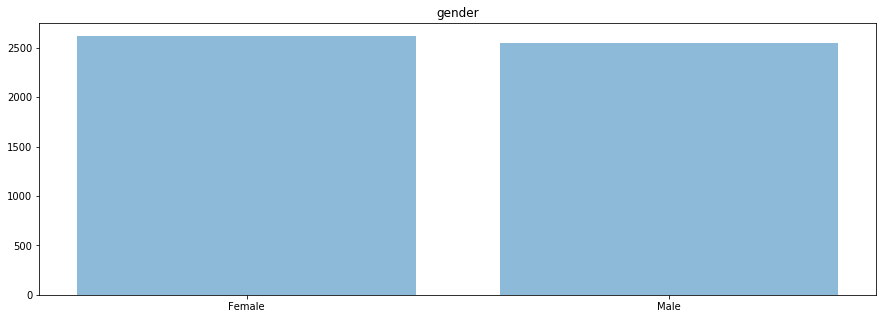

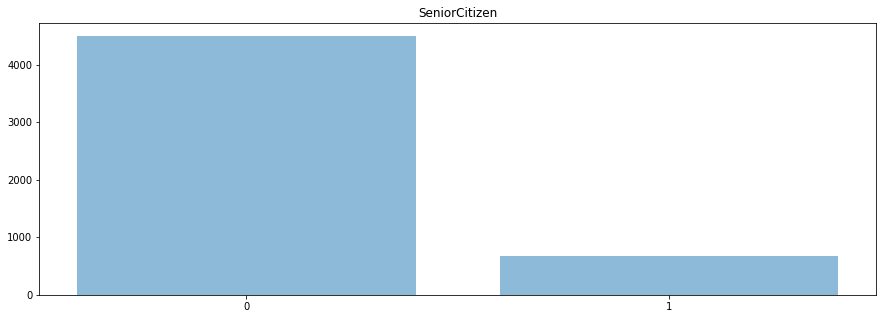

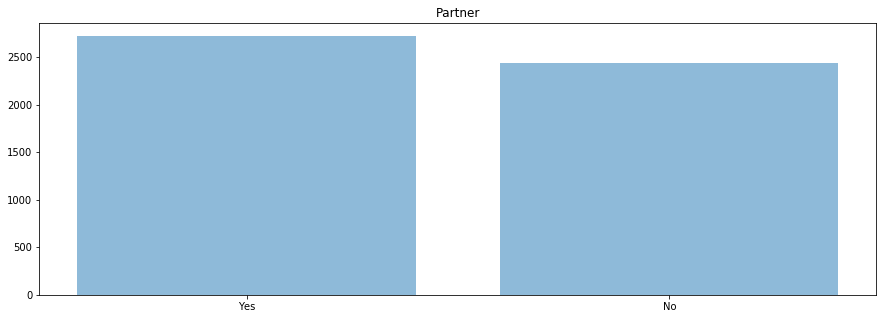

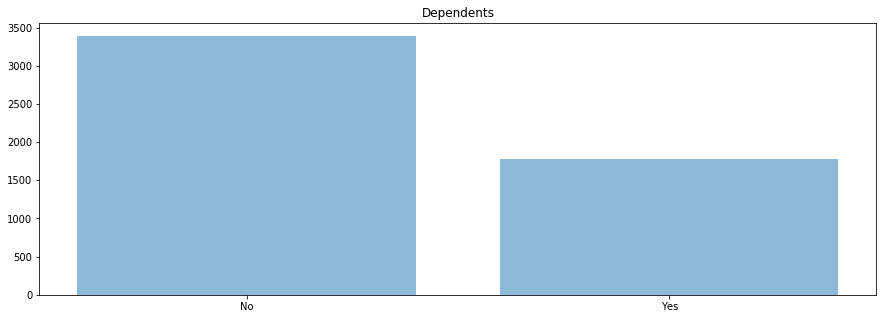

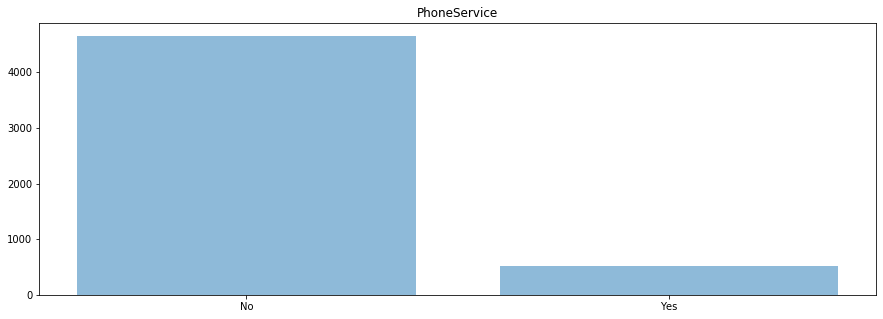

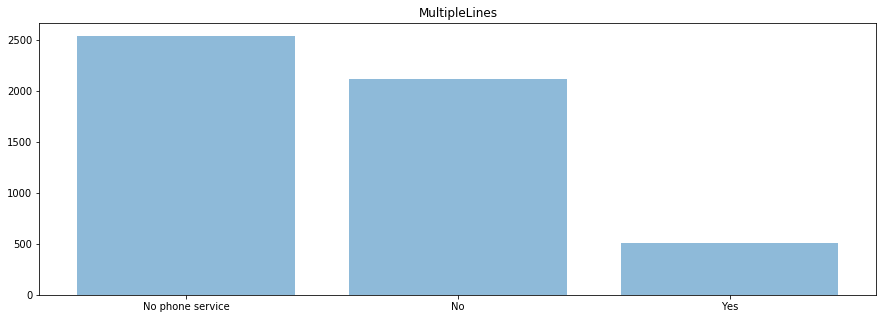

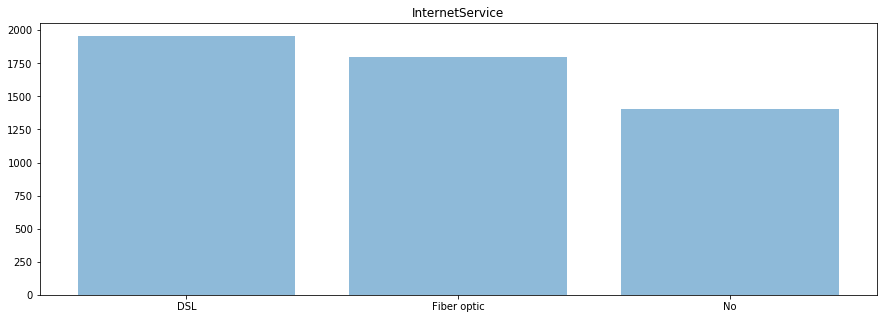

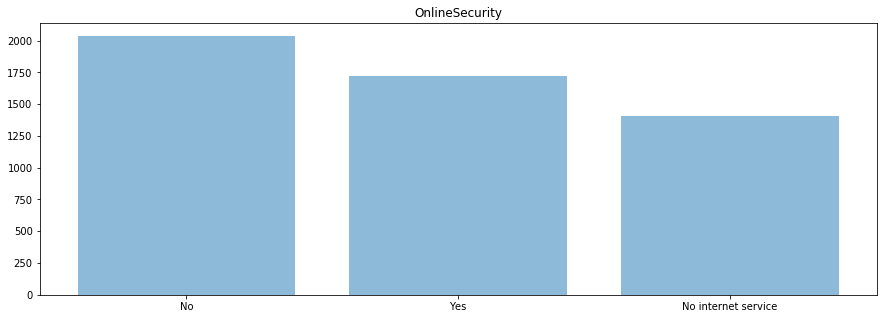

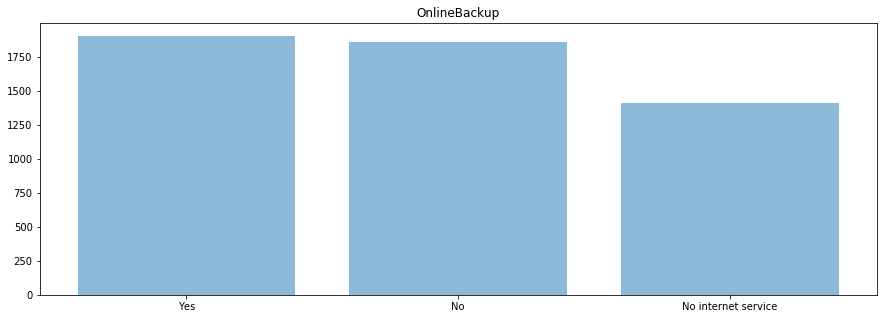

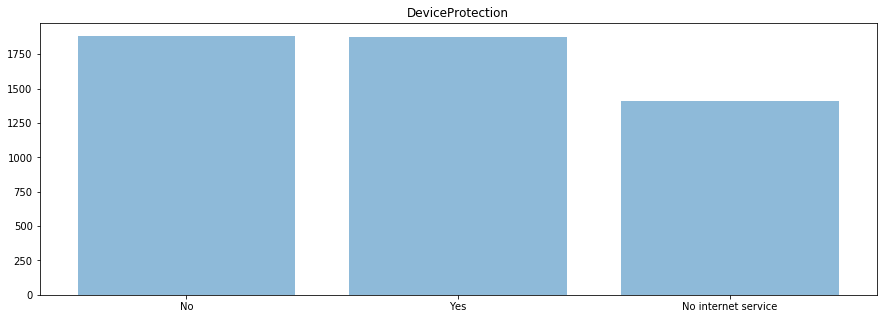

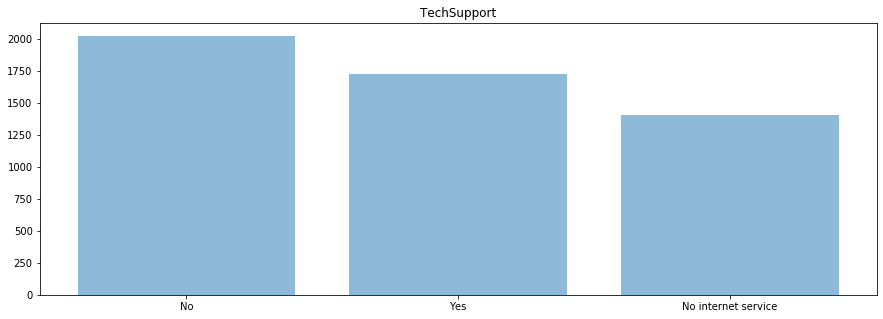

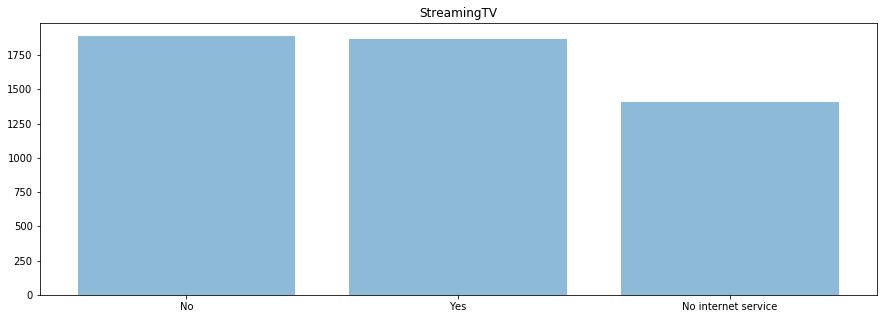

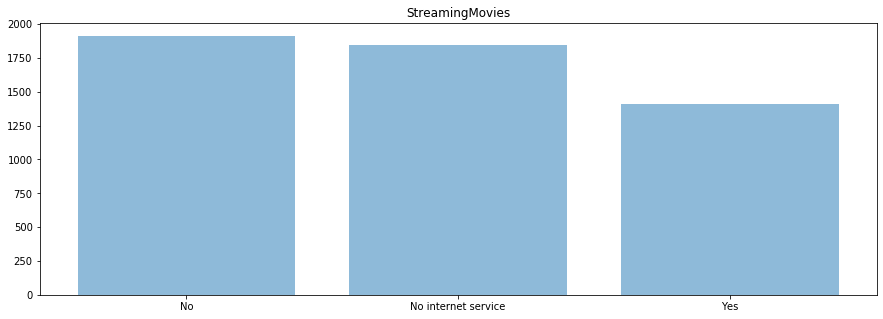

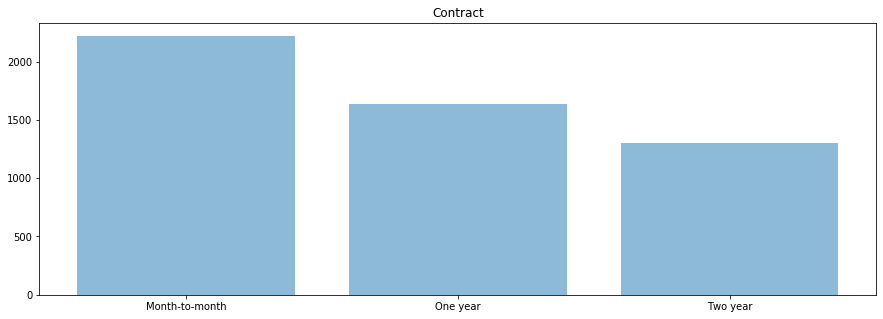

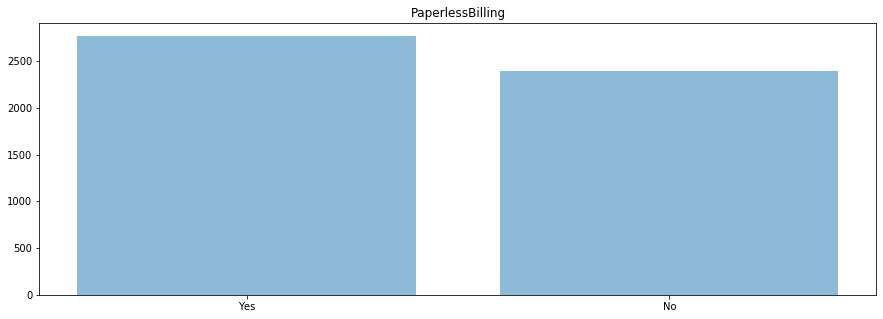

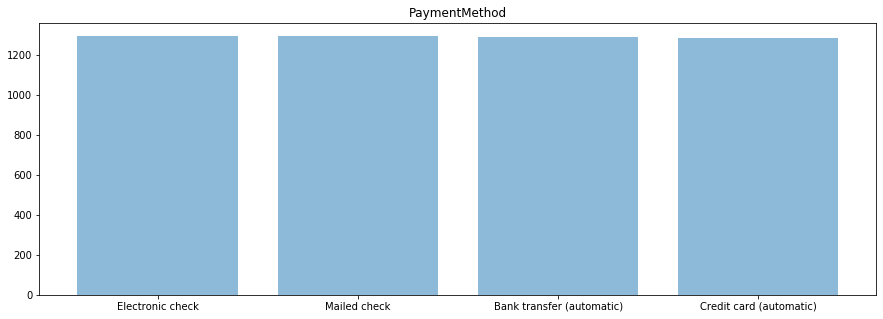

The customerID data is not plotted.
The tenure data is not plotted.
The MonthlyCharges data is not plotted.
The TotalCharges data is not plotted.
The Churn data is not plotted.


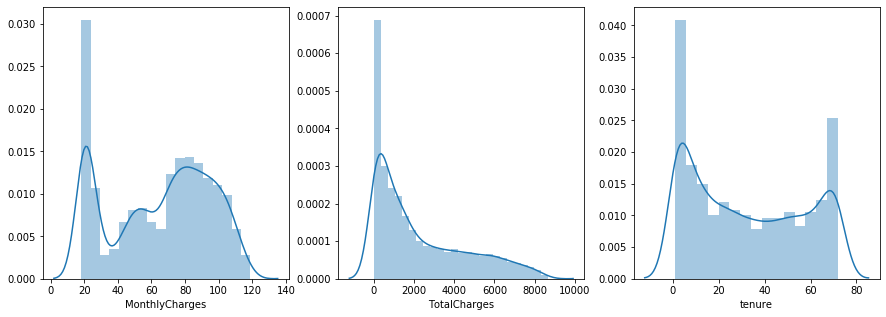

In [20]:
histogram(clients_df_loyal)
fig, ax = plt.subplots(1,3,figsize=(15,5));
sns.distplot(clients_df.MonthlyCharges, ax=ax[0])
sns.distplot(clients_df.TotalCharges, ax=ax[1])
sns.distplot(clients_df.tenure, ax=ax[2])

- En utilisant check_answer(df), on écarte une feature si elle n'a qu'une seule réponse ou si elle a plus de 7043/4 réponse différentes. On a écarté customerID dont on s'en balec et TotalCharges. Mais quand on regarde tenure ou monthlyCharges, c'est difficile de juger la nature des datas. 
- Ploter et regarder ce qui est pertinent de garder ou modifier
- pas de réponses non expectée, pas de texte là ou on attend des int ou float et vice versa, 

## Cleaning missing values

On va vérifier si on a effectivement pas de missing values au niveau des TotalCharges. Inspiré du travail de Thévie

In [105]:
clients_df = clients_df[clients_df['TotalCharges'] != ' '] 
print(len(clients_df)) 
# clients_df ne contient plus que les lignes où TotalCharges contient une valeur numérique

7032


- On a 7032 lignes sorties à l'exécution de la dernière cell. => 11 missing values. En revenant à la cellule avec le plot du describe(include = ['O']), on remarque que freq(TotalCharges) = 11 est la valeur associée top(TotalCharges) = '  '. 

In [106]:
def check_missing(df):
    
    features = list(df.columns)
    for feature in features:
        df = df[df[feature] != ' '] 
        print(len(df))

In [107]:
check_missing(clients_df)

7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032


Avec la fonction check_missing, on remarque que les autres features ne contiennent pas de missing values

## Feature type

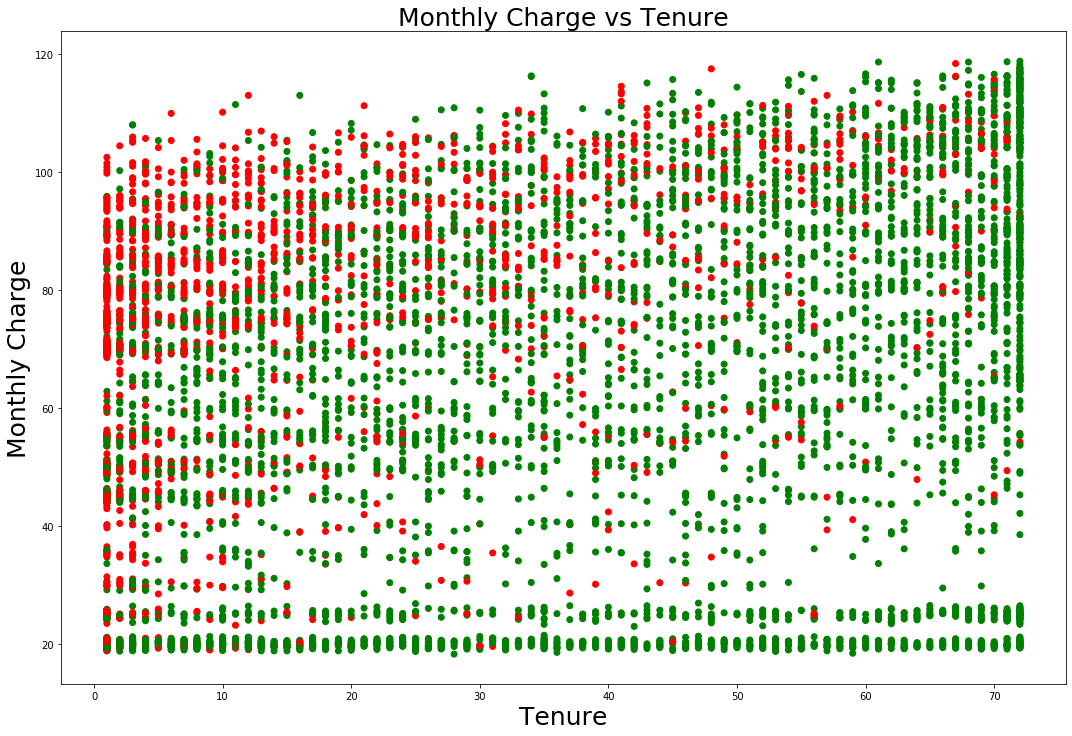

In [117]:
plt.figure(figsize=(18,12))
colors = np.array(['green', 'red'])[list(clients_df.Churn.replace({'Yes':1, 'No':0}))]
plt.scatter(list(clients_df.tenure),list(clients_df.MonthlyCharges) , c=colors)
plt.xlabel('Tenure', fontsize=25)
plt.ylabel('Monthly Charge', fontsize=25)
plt.title('Monthly Charge vs Tenure',fontsize=25 )
plt.show()

- À partir de ce plot, on peut déjà tirer plusieurs conclusions, cf jupyter de Thévie. 
- Dans la donnée, on nous indique que l'on veut se focaliser sur la rétention de clients donc le but pour la suite est de tirer des conclusion sur les données pour les utilisateurs qui n'ont pas churn. 

In [127]:
df_churn = clients_df[clients_df.Churn == 'Yes']
df_stay = clients_df[clients_df.Churn == 'No'] # nombre de cliens fidèles
print(len(df_churn)/(len(df_stay)+len(df_churn))) # ratio
client_df = df_stay

0.26578498293515357


## Categorical variables

Expliquer pourquoi on analyse en fonction du type de contrat, du type d'internet service et phone service

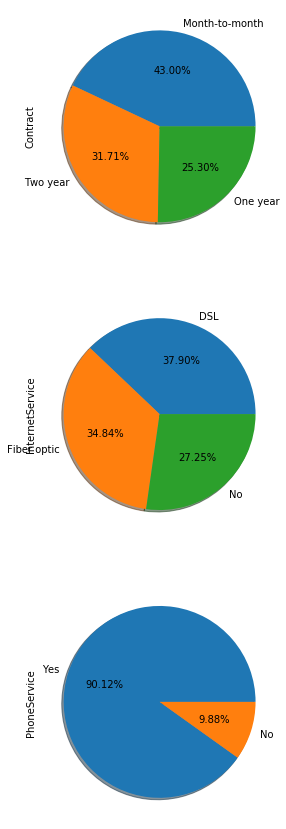

In [168]:
fig, ax =plt.subplots(3,1,figsize=(5,15))
client_df.Contract.value_counts().plot(kind='pie',shadow=True,autopct='%1.2f%%', ax=ax[0])
client_df.InternetService.value_counts().plot(kind='pie',shadow=True,autopct='%1.2f%%', ax=ax[1])
client_df.PhoneService.value_counts().plot(kind='pie',shadow=True,autopct='%1.2f%%', ax=ax[2])

Cellule pour analyser les résultats

## Continuous variables histograms

In [21]:
def histogram_plot(df, feature, n_bins):
    values = df[feature].values
    plt.figure(figsize=(12,6))
    plt.hist(values, bins = n_bins)
    plt.title(feature, fontsize = 20)
    plt.show()

In [22]:
histogram_plot(client_df, 'tenure', 40)
histogram_plot(client_df, 'MonthlyCharges', 30)
histogram_plot(client_df, 'TotalCharges', 40)

NameError: name 'client_df' is not defined

## Multivariate descriptive statistics

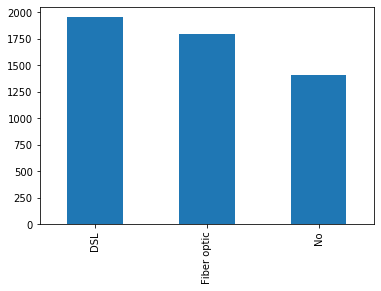

In [222]:
# essai avec matplotlib
client_df.InternetService.value_counts().plot.bar()
df = pd.Dataframe()
#print(client_df.Contract.value_counts())